In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Corona_NLP_train.csv", encoding="latin-1", parse_dates=["TweetAt"])

In [3]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df.shape

(41157, 6)

In [5]:
df.iloc[0]["OriginalTweet"]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

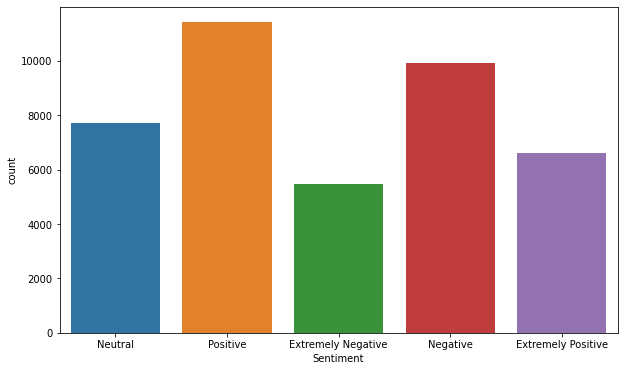

In [6]:
f, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df, x="Sentiment")

In [7]:
df = df.drop(columns=["UserName", "ScreenName", "TweetAt", "Location"])

In [8]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [10]:
df.isna().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

In [12]:
example_sentence = df.iloc[4]["OriginalTweet"]

In [13]:
example_sentence

"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n"

In [14]:
import string

In [15]:
example_sentence = [i for i in example_sentence if i not in string.punctuation]

In [16]:
example_sentence = str.join("", example_sentence)

In [17]:
example_sentence

'Me ready to go at supermarket during the COVID19 outbreak\r\r\n\r\r\nNot because Im paranoid but because my food stock is litteraly empty The coronavirus is a serious thing but please dont panic It causes shortage\r\r\n\r\r\nCoronavirusFrance restezchezvous StayAtHome confinement httpstcousmuaLq72n'

In [18]:
escape_chars = [chr(char) for char in range(1,32)]

In [19]:
escape_chars

['\x01',
 '\x02',
 '\x03',
 '\x04',
 '\x05',
 '\x06',
 '\x07',
 '\x08',
 '\t',
 '\n',
 '\x0b',
 '\x0c',
 '\r',
 '\x0e',
 '\x0f',
 '\x10',
 '\x11',
 '\x12',
 '\x13',
 '\x14',
 '\x15',
 '\x16',
 '\x17',
 '\x18',
 '\x19',
 '\x1a',
 '\x1b',
 '\x1c',
 '\x1d',
 '\x1e',
 '\x1f']

In [20]:
example_sentence = [i for i in example_sentence if i not in escape_chars]

In [21]:
example_sentence = str.join("", example_sentence)

In [22]:
example_sentence

'Me ready to go at supermarket during the COVID19 outbreakNot because Im paranoid but because my food stock is litteraly empty The coronavirus is a serious thing but please dont panic It causes shortageCoronavirusFrance restezchezvous StayAtHome confinement httpstcousmuaLq72n'